# Accessing LSSTCam Calibration Images

In this notebook, I show how to access to the calibration images, such as biases, darks, defects, and flats. All data is stored, organized and managed by the Data Butler. 

## Articles about the Data Butler

1. https://arxiv.org/abs/1812.08085
1.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

import lsst.daf.butler as dB
import lsst.cp.verify.notebooks.utils as utils
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
from lsst.afw import cameraGeom
import pylab as plt

# Loading collections

Raw images can be accessed in the collections "LSSTCam/raw/all", and "LSSTCam/calib", located in the "/repo/main/" repository. However, in this case, we are going to use the super calibrations for detectors 55 and 74, which are in the collections of Jerónimo (fellow intern). These collections are located at "/repo/main/"u/jcalderong/".

In [3]:
genCollection_bias = "u/jcalderong/reca/bias_13144" 
butler_bias = dB.Butler("/repo/main/", collections=genCollection_bias)

genCollection_dark = "u/jcalderong/reca/dark_13144" 
butler_dark = dB.Butler("/repo/main/", collections=genCollection_dark)

genCollection_defects = "u/jcalderong/reca/defect_13144" 
butler_defects = dB.Butler("/repo/main/", collections=genCollection_defects)

# Function for plotting

Exposure is an image in particular, which has an exposure ID and this can be used for access to that image. However, in this case we will deal with super calibrations, which are the combinations of all these individual images or exposures.

In [64]:
def plotImages(exp, typeC, CCD, title=''):  
        """Plot exposures
        
        Parameters
        ----------
        exp : `lsst.afw.image.exposure.Exposure`
            The exposure in which the defects were found.
        title: `str`
            The type of image, e.g., 'bias', 'dark', 'flat'.
        """
        expCopy = exp.clone()  # we mess with the copy later, so make a clone

        disp = afwDisplay.Display(backend="matplotlib", dpi=200)

        disp.scale('asinh', 'zscale')
        disp.setMaskTransparency(80)
        disp.setImageColormap('gray')
        title = ""
        disp.mtv(expCopy, title=title)
        disp.savefig(f"./Calibs/Super_{typeC}_{CCD}.png", dpi = 200)
        return

# Biases
### Calling the data from collections

These are the superbias for these two detectors, which are from each of the manufacturers of the CCDs in this camera. We see that they have different patterns.

imprimiedo exp: <lsst.afw.image.exposure.ExposureF object at 0x7f865453e630>


<Figure size 432x288 with 0 Axes>

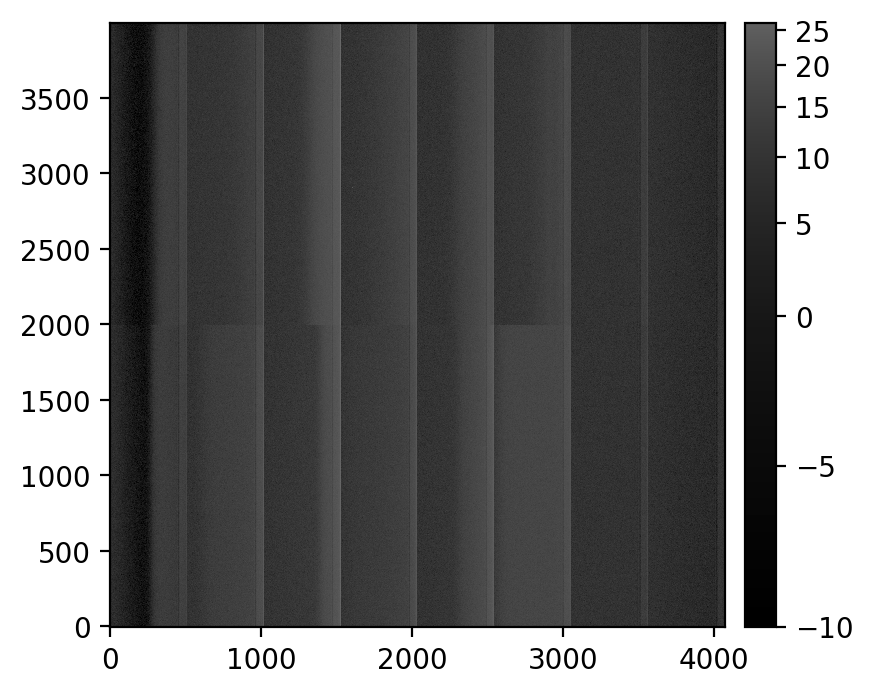

imprimiedo exp: <lsst.afw.image.exposure.ExposureF object at 0x7f8654715330>


<Figure size 432x288 with 0 Axes>

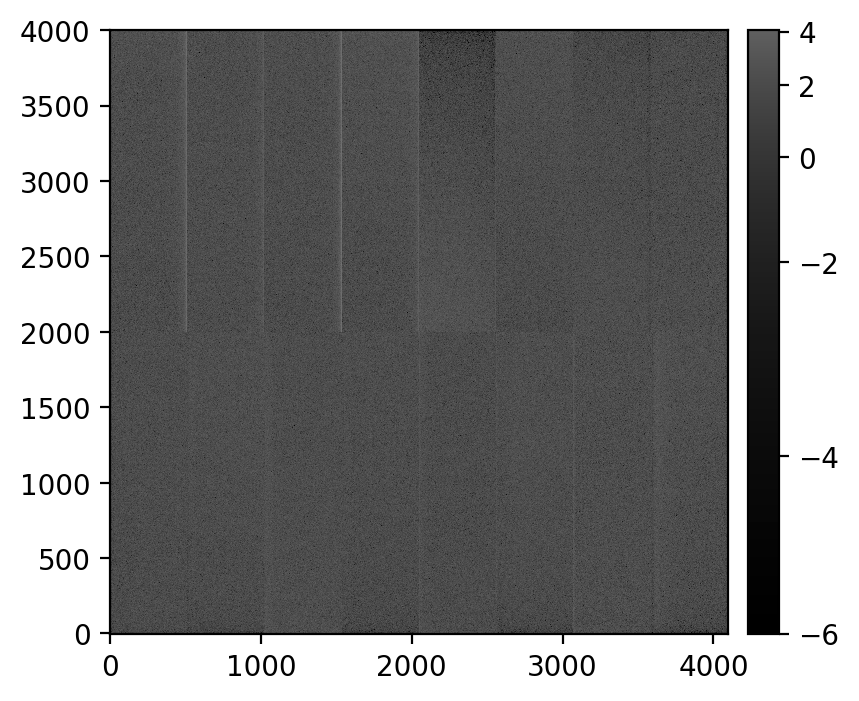

In [40]:
# ID number of the detectors we are going to use
CCD_E2V = 55
CCD_ITL = 74

super_bias74 = butler_bias.get('bias', detector=CCD_ITL,  instrument='LSSTCam')
plt.figure()
plotImages(super_bias74, 'bias', CCD_ITL, title='Bias 74')
plt.show()


super_bias55 = butler_bias.get('bias', detector=CCD_E2V,  instrument='LSSTCam')
plt.figure()
plotImages(super_bias55, 'bias', CCD_E2V, title = 'Bias 55')
plt.show()

### Image data

But if what we want is not the image, but the data to make calculations with them, they can be accessed as follows

In [77]:
image_data = super_bias74.image.array
print(image_data)

[[ 5.18278     4.349447    3.8494465  ...  1.6821289   3.0154622
   6.7654624 ]
 [ 7.849447    8.349446    8.766113   ...  2.182129    2.5953481
   6.7654624 ]
 [-0.40055338 -0.23388672  0.5161133  ...  2.8764205   2.7654622
   6.932129  ]
 ...
 [ 9.986328    9.486328   10.069661   ...  1.6552734   1.2386068
   5.1552734 ]
 [ 9.986328   10.069661   13.152995   ...  0.98860675  1.2386068
   4.1552734 ]
 [ 7.5696616   6.513672    6.9029946  ...  1.3219401   2.4052734
   5.9052734 ]]


And see the distribution of flux...

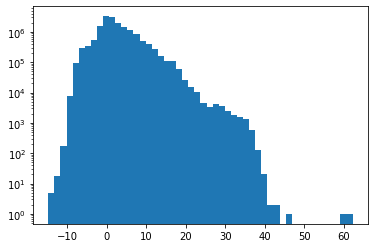

In [78]:
plt.hist(image_data.ravel(), bins=50); 
plt.yscale('log')

### Metadata

The Butler also gives us access to the image metadata. Let's see

In [81]:
metadata_raw = butler_bias.get('raw.metadata', detector=74, exposure=3021120600555 )
for key in metadata_raw.keys():
    print(key, metadata_raw[key])

SIMPLE True
EXTEND True
DATE 2021-12-07T05:54:50.568
MJD 59555.24641861115
RUNNUM 13144
CCD_MANU ITL
CCD_TYPE 3800C
TESTTYPE BIAS
IMGTYPE BIAS
EXPTIME 0.0
BINX 1
BINY 1
CCDGAIN 1.0
CCDNOISE 10.0
DATE-OBS 2021-12-07T05:54:50.457
MJD-OBS 59555.24641732639
DATE-TRG 2021-12-07T05:54:50.457
MJD-TRG 59555.24641732639
IMAGETAG 97bd2098759b5772
CCDSLOT S02
RAFTBAY R20
FIRMWARE 31395007
PLATFORM ir2-camera
CONTNUM 18ee34c0
DAQVERS R5-V0.11 2021-11-03T15:13:45Z (fbaf2dd)
DAQPART camera
DAQFOLD raw
DAQANNOT 
OBSID MC_C_20211206_000555
TELCODE MC
CONTRLLR C
DAYOBS 20211206
SEQNUM 555
HEADVER 2
INSTRUME lsstCam
TELESCOP LSST
TSTAND BOT
SEQFILE FP_ITL_2s_ir2_v26.seq
SEQCKSUM 980618532
LSST_NUM ITL-3800C-427
CCD_SERN 24905
REBNAME LCA-13574-066
RAFTNAME LCA-11021_RTM-014
DARKTIME 0.085
TSEQNUM 0
BOTXCAM -395.023
BOTYCAM -400.0
BOTX 800.023
BOTY 800.0
FPVERS 1.0.28
IHVERS 1.0.21
XTENSION IMAGE
BITPIX 32
NAXIS 2
NAXIS1 576
NAXIS2 2048
PCOUNT 0
GCOUNT 1
CHECKSUM UPpLaPmIVPmIaPmI
CHANNEL 1
EXTNAME Segmen

In [80]:
metadata_supercalib = super_bias74.getMetadata()
for key in metadata_supercalib.keys():
    print(key, metadata_supercalib[key])

OBSTYPE bias
CALIB_CREATE_DATE 2022-06-23
CALIB_CREATE_TIME 08:30:38 CDT
RUNNUM 13144
CCD_MANU ITL
CCD_TYPE 3800C
TESTTYPE BIAS
IMGTYPE BIAS
BINX 1
BINY 1
CCDGAIN 1.0
CCDNOISE 10.0
CCDSLOT S02
RAFTBAY R20
FIRMWARE 31395007
PLATFORM ir2-camera
CONTNUM 18ee34c0
DAQVERS R5-V0.11 2021-11-03T15:13:45Z (fbaf2dd)
DAQPART camera
DAQFOLD raw
DAQANNOT 
TELCODE MC
CONTRLLR C
DAYOBS 20211206
HEADVER 2
INSTRUME lsstCam
TELESCOP LSST
TSTAND BOT
SEQFILE FP_ITL_2s_ir2_v26.seq
SEQCKSUM 980618532
LSST_NUM ITL-3800C-427
CCD_SERN 24905
REBNAME LCA-13574-066
RAFTNAME LCA-11021_RTM-014
BOTXCAM -395.023
BOTYCAM -400.0
BOTX 800.023
BOTY 800.0
FPVERS 1.0.28
IHVERS 1.0.21
CHANNEL 1
CCDSUM 1 1
DETSEC [509:1,1:2000]
DETSIZE [1:4072,1:4000]
DTV1 513
DTV2 0
DTM1_1 -1.0
DTM2_2 1.0
DTM1_2 0.0
DTM2_1 0.0
WCSNAMEA AMPLIFIER
PC1_1A 0.0
PC1_2A -1.0
PC2_1A -1.0
PC2_2A 0.0
CDELT1A 1.0
CDELT2A 1.0
WCSNAMEC CCD
CTYPE1C CCD_X
CTYPE2C CCD_Y
PC1_1C 0.0
PC1_2C -1.0
PC2_1C -1.0
PC2_2C 0.0
CDELT1C 1.0
CDELT2C 1.0
CRPIX1C 0.0
CRPIX

# Darks

imprimiedo exp: <lsst.afw.image.exposure.ExposureF object at 0x7f865422dff0>


<Figure size 432x288 with 0 Axes>

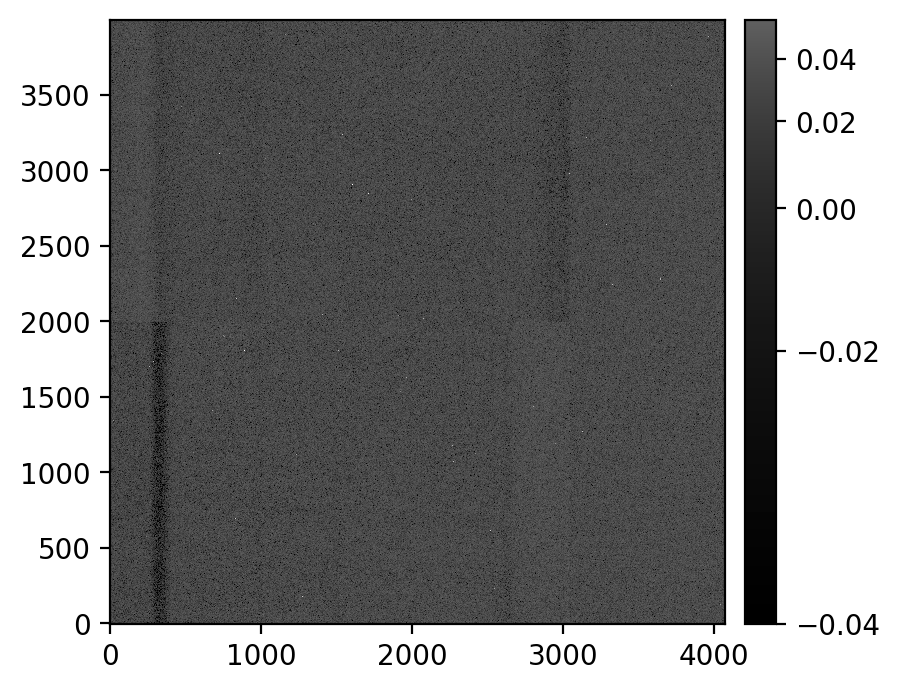

imprimiedo exp: <lsst.afw.image.exposure.ExposureF object at 0x7f86541400b0>


<Figure size 432x288 with 0 Axes>

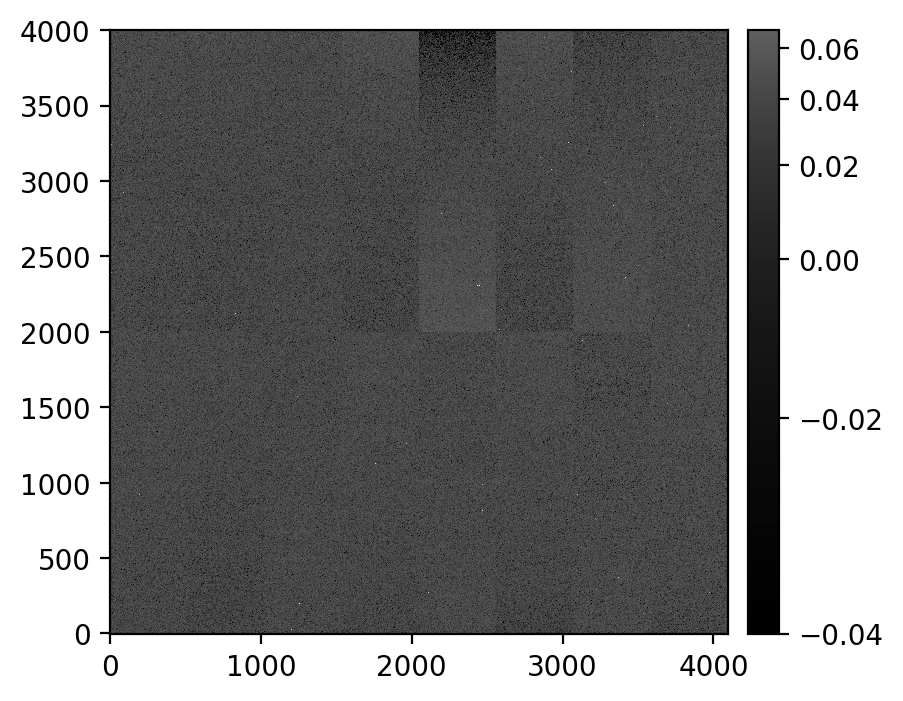

In [41]:
super_dark74 = butler_dark.get('dark', detector=CCD_ITL,  instrument='LSSTCam')
plt.figure()
plotImages(super_dark74, 'dark', CCD_ITL, title='dark 74')
plt.show()


super_dark55 = butler_dark.get('dark', detector=CCD_E2V,  instrument='LSSTCam')
plt.figure()
plotImages(super_dark55, 'dark', CCD_E2V, title = 'dark 55')
plt.show()

# Defects

The defects are maps that includes both bright defects and dark defects. 

# Fits images

The Rubin Scientific Platform saves you from downloading all the data and gives you a suitable environment to work in. I worked on that platform, however, we can download the images in FITS, which are in the collections location.

In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# E2V detector
defects = fits.open('./Images/Calib_Images/defects_LSSTCam_R20_S02_u_jcalderong_reca_defect_13144_20220625T162652Z.fits')
defects_data = defects[1].data
cols = defects[1].columns
print(defects.info())
defects.close()


Filename: ./Images/Calib_Images/defects_LSSTCam_R20_S02_u_jcalderong_reca_defect_13144_20220625T162652Z.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     30   5415R x 4C   ['K', 'K', 'K', 'K']   
None


Each defect is masked with a rectangular box, where (x0,y0) is the lower left corner of the box and width and height are the dimensions of the box.  So, for example, 4063, 3996, 1, 1 is just a single pixel.  57,8,15,1 is a rectangular defect 15 pixels wide. Then, the defects are an array of  5415 rows by 4 columns, the columns are x0, y0, width, and height.

In [27]:
cols

ColDefs(
    name = 'x0'; format = 'K'
    name = 'y0'; format = 'K'
    name = 'width'; format = 'K'
    name = 'height'; format = 'K'
)

In [31]:
cols.info()

name:
    ['x0', 'y0', 'width', 'height']
format:
    ['K', 'K', 'K', 'K']
unit:
    ['', '', '', '']
null:
    ['', '', '', '']
bscale:
    ['', '', '', '']
bzero:
    ['', '', '', '']
disp:
    ['', '', '', '']
start:
    ['', '', '', '']
dim:
    ['', '', '', '']
coord_type:
    ['', '', '', '']
coord_unit:
    ['', '', '', '']
coord_ref_point:
    ['', '', '', '']
coord_ref_value:
    ['', '', '', '']
coord_inc:
    ['', '', '', '']
time_ref_pos:
    ['', '', '', '']


For access to the x0 column we do...

In [30]:
defects_data.field(0)

array([   7,    8,   13, ..., 3959, 3961, 3966], dtype=int64)

In [ ]:
super_defects74 = butler_defects.get('defects', detector=CCD_ITL,  instrument='LSSTCam')
plt.figure()
plotImages(super_defects74, 'defects', CCD_ITL, title='defects 74')
plt.show()

imprimiedo exp: Defects(obstype=defects, detector=R20_S02, )(minimum=(7, 7), maximum=(346, 7)),(minimum=(8, 8), maximum=(11, 8)),(minimum=(13, 8), maximum=(31, 8)),(minimum=(33, 8), maximum=(42, 8)),(minimum=(44, 8), maximum=(44, 8)),(minimum=(47, 8), maximum=(47, 8)),(minimum=(50, 8), maximum=(52, 8)),(minimum=(54, 8), maximum=(55, 9)),(minimum=(57, 8), maximum=(68, 8)),(minimum=(70, 8), maximum=(74, 8)),(minimum=(76, 8), maximum=(83, 8)),(minimum=(85, 8), maximum=(87, 8)),(minimum=(89, 8), maximum=(93, 8)),(minimum=(95, 8), maximum=(95, 8)),(minimum=(97, 8), maximum=(111, 8)),(minimum=(113, 8), maximum=(114, 8)),(minimum=(117, 8), maximum=(123, 8)),(minimum=(126, 8), maximum=(126, 8)),(minimum=(128, 8), maximum=(132, 8)),(minimum=(134, 8), maximum=(135, 8)),(minimum=(137, 8), maximum=(137, 8)),(minimum=(139, 8), maximum=(142, 8)),(minimum=(144, 8), maximum=(146, 8)),(minimum=(148, 8), maximum=(149, 8)),(minimum=(151, 8), maximum=(154, 8)),(minimum=(156, 8), maximum=(159, 8)),(minimum

RuntimeError: Unsupported type <lsst.ip.isr.defects.Defects object at 0x7f86511939a0>

<Figure size 432x288 with 0 Axes>

<Figure size 1200x800 with 0 Axes>